# Smartwatch Data Analysis

In [2]:
# Importing necessary libraries for data analysis and visualization
import pandas as pd        # Pandas: powerful data manipulation library
import numpy as np         # NumPy: fundamental package for scientific computing
import matplotlib.pyplot as plt    # Matplotlib: plotting library for creating static, interactive, and animated visualizations
import plotly.express as px        # Plotly Express: easy-to-use interface for creating interactive plots
import plotly.graph_objects as go  # Plotly Graph Objects: provides more control over plots with a lower-level interface

In [5]:
# Load the daily activity data from the provided URL into a Pandas DataFrame.
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/dailyActivity_merged.csv")

# Display the first few rows of the DataFrame to examine the structure and content of the data.
print(data.head())


           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366    4/12/2016       13162           8.50             8.50   
1  1503960366    4/13/2016       10735           6.97             6.97   
2  1503960366    4/14/2016       10460           6.74             6.74   
3  1503960366    4/15/2016        9762           6.28             6.28   
4  1503960366    4/16/2016       12669           8.16             8.16   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.57                      0.69   
2                       0.0                2.44                      0.40   
3                       0.0                2.14                      1.26   
4                       0.0                2.71                      0.41   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                 6.06

In [6]:
# Displaying a brief summary of the DataFrame 'data',
# showing column data types, non-null counts, and memory usage.
# It uses the info() method.
data_summary = data.info()
print(data_summary)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [7]:
# Convert the 'ActivityDate' column to datetime format to improve time management.
data["ActivityDate"] = pd.to_datetime(data["ActivityDate"], format="%m/%d/%Y")

# Print summary information about the DataFrame to confirm the modifications.
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [8]:
# Determine the total minutes spent across different activity levels and add it as a new column.
data["TotalMinutes"] = (
    data["VeryActiveMinutes"] +
    data["FairlyActiveMinutes"] +
    data["LightlyActiveMinutes"] +
    data["SedentaryMinutes"]
)

# Randomly select a subset of total minutes data for analysis and print it.
print(data["TotalMinutes"].sample(5))


385     918
790    1440
914    1440
244    1440
243    1440
Name: TotalMinutes, dtype: int64


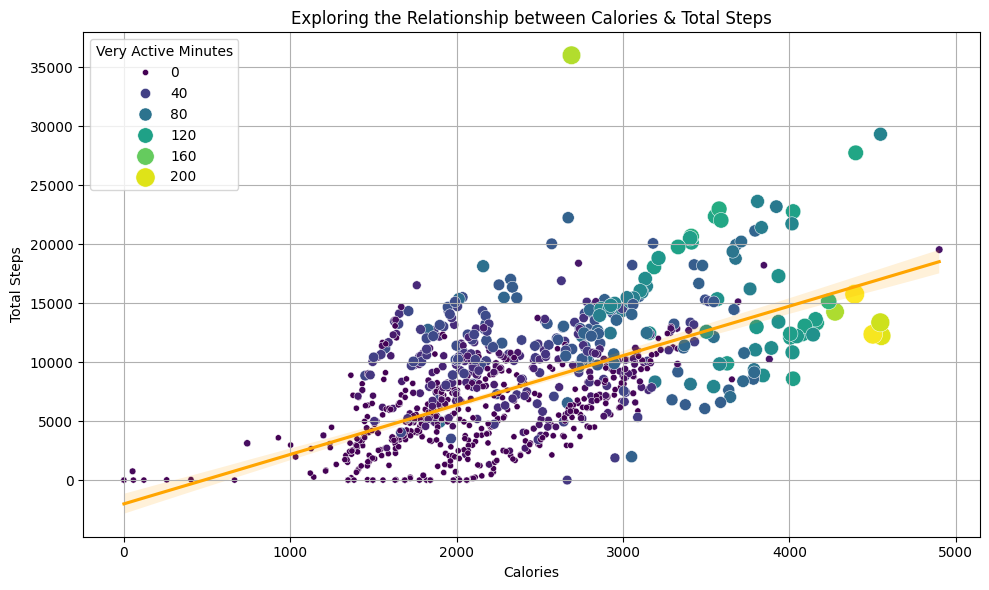

In [10]:
import seaborn as sns

# Visualizing the relationship between Calories and Total Steps with a unique style.
plt.figure(figsize=(10, 6))

# Scatter plot with a twist of color.
sns.scatterplot(data=data, x="Calories", y="TotalSteps", hue="VeryActiveMinutes", palette="viridis", size="VeryActiveMinutes", sizes=(20, 200))

# Adding a trendline with a vibrant touch.
sns.regplot(data=data, x="Calories", y="TotalSteps", scatter=False, color='orange')

# Adding title and labels to the plot.
plt.title("Exploring the Relationship between Calories & Total Steps")
plt.xlabel("Calories")
plt.ylabel("Total Steps")

# Adding a legend.
plt.legend(title='Very Active Minutes')

# Displaying the revamped plot.
plt.grid(True)
plt.tight_layout()
plt.show()


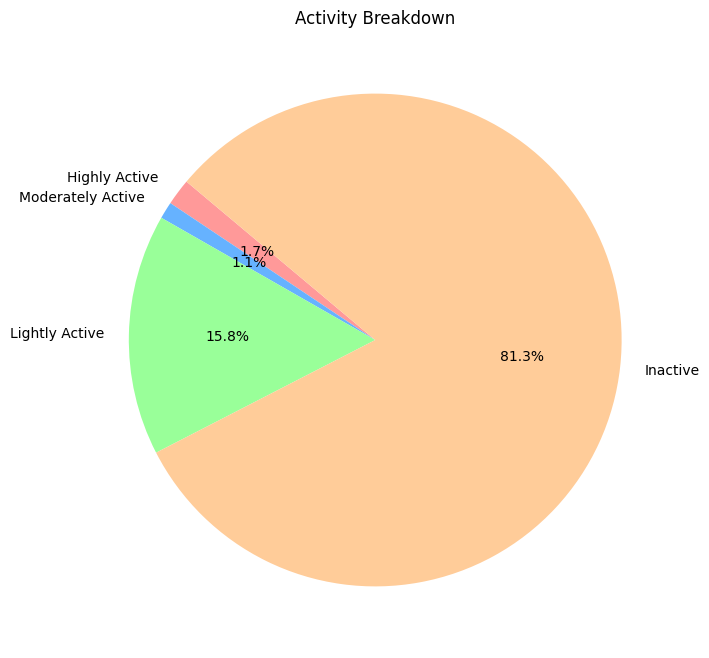

In [11]:
# Calculating the mean of different activity minutes.
activity_counts = data[["VeryActiveMinutes", "FairlyActiveMinutes",
                       "LightlyActiveMinutes", "SedentaryMinutes"]].mean()

# Labels for the pie chart.
labels = ["Highly Active", "Moderately Active",
          "Lightly Active", "Inactive"]

# Generating a custom color palette.
custom_colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']

# Creating a pie chart with custom colors using Matplotlib.
plt.figure(figsize=(8, 8))
plt.pie(activity_counts, labels=labels, colors=custom_colors, autopct='%1.1f%%', startangle=140)

# Adding a creative title to the plot.
plt.title('Activity Breakdown')

# Displaying the modified plot.
plt.show()


## Observations indicate that:

- 81.3% of the total daily minutes were spent inactive.
- Lightly active minutes constituted 15.8% of the day.
- On average, merely 21 minutes (1.74%) were classified as very active.
- Fairly active minutes accounted for only 1.11% of the day, totaling 13 minutes.